## 最小二乘法

#### 最优公式


- 线性回归中, 结果必定为线性函数, 可表达为: $ f(x;w) = W^Tx $

- 其中 $W^Tx = w_0b + w^Tx $

- Loss Function: 

$$ \mathcal{L}(W) \triangleq \sum_{n=1}^N \rVert(W^Tx_i - y_i) \rVert^2$$

- 其等同于: 
$$ \begin{align}
\mathcal{L}(W)  =& \sum_{n=1}^N (W^Tx_i - y_i)^2 \\
 =& (W^TX^T-Y^T)(XW-Y) \\
 =& W^TX^TXW-W^TX^T - Y^TXW + Y^TY \\
 =& W^TX^TXW- 2W^TX^TY + Y^TY
\end{align}
$$

- 对W求最小, 需要对其求导: $$ \frac {\delta L(W)} {\delta W} = 2X^TXW- 2X^TY = 0 $$

- 可得: $$\hat{W} = (X^TX)^{-1}X^TY (1)$$

- 上面是从每一个数据点的误差来看的, $W^TX_i$所得的y与实际$y_i$差值最小化$

- 也可以从投影角度来看, 如果将数据X的每一个维度看成一个空间, 让最终值y的独立于每一个空间, 那么y的投影向量(XW)与实际y的向量组成的虚向量(Y-XW)必然垂直X空间X

- 那么就有: $$ X^T(Y-XW) = 0$$ 换算也可以获得(1)公式


#### 高斯噪声

最小二乘估计隐含了一个噪声服从正态分布的假设

#### 使用公式计算

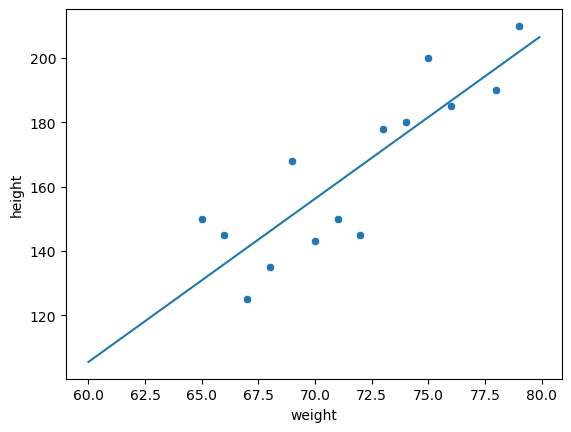

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

gender = 'gender'
weight = 'weight'
height = 'height'

dataUrl = '.\\heightWeightData.csv'

df = pd.read_csv(dataUrl)

# 规整数据
df = df[df[gender] == 1] 
df = df[df[height] < 240]
df = df.loc[:,[weight, height]]
df = df.drop_duplicates(subset=weight)

# X = b + w
X = df[weight].values
X = X.reshape(-1, 1)
B = np.ones((X.shape[0], 1))
Y = df[height].values
X=np.column_stack((B,X))

# 套用参数计算公式
A = np.matmul(X.T, X)
X = np.matmul(np.matrix(A).I, X.T)
W = np.matmul(X,Y)

# 绘图
xy = pd.DataFrame()
xy['x'] = np.arange(60, 80, 0.1)
xy['y'] = xy['x'].apply(lambda x: x*W[0,1] + W[0,0])
sns.scatterplot(data=df,x= weight, y = height)
sns.lineplot(data=xy, x = 'x', y='y')
plt.show()